# Übungsblatt 5 (Visualisierung) - Grundkonzepte der Datenanalyse und Visualisierung WS 2024/25

Ziel dieses Übungsteils ist es, selbst Visualisierungen in Form von Diagrammen mit Hilfe von matplotlib/pandas und Seaborn zu erstellen. Dabei geht es einerseits darum, mit der Verwendung der entsprechenden APIs vertraut zu werden, und andererseits sollen auch die Anforderungen an korrekte und gute Visualisierungen verinnerlicht werden. Dies betrifft allgemeine Regeln und Konventionen die alle Visualisierungen betreffen genauso wie spezielle Voraussetzungen für einzelne Diagrammtypen.

Das Übungsblatt besteht aus den verschiedenen in der Vorlesung besprochenen Visualisierungsmethoden.

**Achten Sie bei allen Grafiken auf die in der Vorlesung erwähnten Regeln und Hinweise (bzgl. Beschriftung, Sortierung, etc.), und versuchen Sie so einfach wie möglich erfassbare Diagramme zu erstellen (Farbeinsatz, etc.)**

## Datensätze (und Vorgehen)

Wir führen für dieses Übungsblatt keine neuen Datensätze ein, sondern arbeiten auf den bereits aus den Übungsblättern 1-4 bekannten Daten. Eine genaue Beschreibung der Daten (inkl. Quellenangaben) finden Sie in den Notebooks der jeweiligen Übungsblätter. Ein paar der Datensätze wurde für dieses Übungsblatt angepasst. Die jeweilige Anpassung wird direkt bei der ersten Verwendung des jeweiligen Datensatzes beschrieben.

Die Datensätze sind:
- `CaffeineContent.csv`: Informationen zu Getränken (Packungsgröße, Koffein- und Kaloriengehalt; Übungsblatt 1)
- `EconomyIndicators.csv`: Wirtschaftliche Kenngrößen (Übungsblatt 2)
- `HousoldPowerConsumption.csv`: Messungen zum Energieverbraucht eines Haushalts (Übungsblatt 4)
- `Nobelpreise.csv`: Vergebene Nobelpreise (Übungsblatt 2)
- `StarDataset.csv`: Beobachtungen zu Sternen und deren Klassifikation (Übungsblatt 4)
- `WohnungsbauOesterreich2023.csv`: Auflistung von Bewilligungen und Fertigstellungen von Wohnungen in Österreich (Aktualisiert von Übungsblatt 3)
- `WohnungsbauPredictions.csv`: Ergebnisse des Multilinearen Regressionsmodells aus Übungsblatt 3 (`df_merror` von Übungsblatt 3)

Dieses Übungsblatt ist nach den Datensätzen strukturiert - nicht nach den zu erstellenden Diagrammtypen. Dies soll zu einer (zumindest geringen) Verteilung ähnlicher Diagramme führen, und somit durch wiederholtes Auseinandersetzen mit ähnlichen Diagrammtypen deren Eigenschaften (und evtl. auch Erstellung) festigen. Wir empfehlen daher das Übungsblatt von "oben nach unten" durchzuarbeiten, und nicht einen Durchgang pro Diagrammtyp zu machen.

In [1]:
src_stars = 'StarDataset.csv'
src_drinks = 'CaffeineContent.csv'
src_flats = 'WohnungsbauOesterreich2023.csv'
src_flats_predictions = 'WohnungsbauPredictions.csv'
src_nobelp = 'Nobelpreise.csv'
src_power = 'HousoldPowerConsumption.csv'
src_economy = 'EconomyIndicators.csv'

Am Beginn steht der Import der Bibliotheken.

In [2]:
# imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

## Nobelpreise

In [3]:
df_nobelp = pd.read_csv(src_nobelp, sep=';')
df_nobelp

,Id,Firstname,Surname,Born,Died,Born country,Born country code,Born city,Died country,Died country code,Died city,Gender,Year,Category,Overall motivation,Motivation,Organization name,Organization city,Organization country
0,480,Elihu,Root,1845-02-15,1937-02-07,USA,US,Clinton NY,USA,US,New York NY,male,1912,Peace,NaN,"""for bringing about better understanding betwe...",NaN,NaN,NaN
1,510,John,Boyd Orr,1880-09-23,1971-06-25,Scotland,GB,Kilmaurs,Scotland,GB,Edzell,male,1949,Peace,NaN,"""for his lifelong effort to conquer hunger and...",NaN,NaN,NaN
2,538,Anwar,al-Sadat,1918-12-25,1981-10-06,Egypt,EG,Mit Abu al-Kawm,Egypt,EG,Cairo,male,1978,Peace,NaN,"""for jointly having negotiated peace between E...",NaN,NaN,NaN
3,541,Adolfo,Pérez Esquivel,1931-11-26,NaN,Argentina,AR,Buenos Aires,NaN,NaN,NaN,male,1980,Peace,NaN,"""for being a source of inspiration to represse...",NaN,NaN,NaN
4,550,United Nations Peacekeeping Forces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1988,Peace,NaN,"""for preventing armed clashes and creating con...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,468,Bertha,von Suttner,1843-06-09,1914-06-21,Austrian Empire (now Czech Republic),CZ,Prague,Austria,AT,Vienna,female,1905,Peace,NaN,"""for her audacity to oppose the horrors of war""",NaN,NaN,NaN
996,552,Mikhail,Gorbachev,1931-03-02,2022-08-30,USSR (now Russia),RU,Privolnoye,Russia,RU,Moscow,male,1990,Peace,NaN,"""for the leading role he played in the radical...",NaN,NaN,NaN
997,703,Trygve,Haavelmo,1911-12-13,1999-07-26,Norway,NO,Skedsmo,Norway,NO,Oslo,male,1989,Economics,NaN,"""for his clarification of the probability theo...",University of Oslo,Oslo,Norway
998,726,Zhores,Alferov,1930-03-15,2019-03-01,USSR (now Belarus),BY,Vitebsk Belorussia,Russia,RU,St. Petersburg,male,2000,Physics,"""for basic work on information and communicati...","""for developing semiconductor heterostructures...",A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia


Bereits in Übungsblatt 2 hatten wir die Verteilung der Preise (Anzahl der Preise pro Kategorie, Land, ...) aus den Rohdaten herausgearbeitet. 
Nun wollen wir diese Verteilung mit Hilfe von zwei Diagrammen auch leicht verständlich aufbereiten.

Unsere wichtigste Frage: Mit einem Nobelpreis in welcher Kategorie gehören wir zur kleinsten Gruppe an Preisträger:innen? Da ein Nobelpreis in einem Jahr an mehrere Personen vergeben werden kann, gibt es in den unterschiedlichen Kategorien unterschiedlich viele Personen (oder Organisationen), die mit einem Nobelpreis ausgezeichnet wurden. Wir wollen für jede Kategorie wissen: wie viele Personen haben in dieser Kategorie einen Nobelpreis erhalten, und dies mit Hilfe eines Balkendiagramms visualisieren.

<Axes: xlabel='Category', ylabel='Number of Prices'>

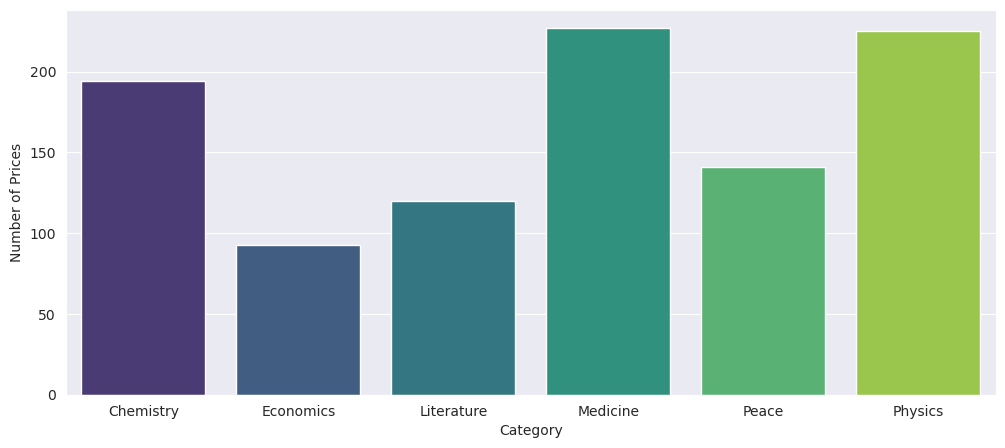

In [4]:
## Erstellen Sie ein Balkendiagramm mit einem Balken pro Kategorie (Category), welcher die Anzahl an Preisträger:innen 
## (inkludiert Personen genauso wie Organisationen) in dieser Kategorie darstellt.
## Achten Sie darauf, alle Eigenschaften eines Balkendiagramms zu erfüllen, und die in der Vorlesung vorgestellten Konventionen einzuhalten.
##
## Lösen Sie diese Aufgabe mittels der Seaborn API! (Nicht direkt mit matplotlib/DataFrames)
## 
## Es kann hilfreich/nötig sein, die Daten vor dem Visualisieren erst einmal aufzubereiten. 
## Verändern Sie dabei das DataFrame 'df_nobelp' nicht. Wenn Sie Daten vor dem Visualisieren erst aufbereiten, 
## dann tun Sie dies in einem neuen DataFrame/einer neuen Datenstruktur.
## Achten Sie darauf, wirklich nur Balken für die Kategorien zu haben (andere Merkmale aus 'df_nobelp' interessieren uns nicht).

features = ['Id', 'Firstname', 'Surname', 'Born', 'Died', 'Born country', 'Born city', 'Died country',
            'Born country code', 'Died city', 'Gender', 'Year', 'Overall motivation', 'Died country code',
            'Motivation', 'Organization name', 'Organization city', 'Organization country']

df_nobelp_reworked = df_nobelp.drop(columns=features)
df_nobelp_reworked = df_nobelp_reworked.groupby('Category').size().reset_index(name='Number of Prices')
plt.rcParams["figure.figsize"] = (12,5)  # regelt die Größe (Breite und Höhe) der Grafik. Funktioniert bei uns gut, können Sie aber nach belieben anpassen.
sns.barplot(data=df_nobelp_reworked, x='Category', y='Number of Prices', hue='Category', palette='viridis', legend=False)

In [5]:
# Dummy zur Abbildung der Bewertung


Als zweite Eigenschaft wollen wir die jährliche Verteilung der Preisträger:innen auf deren Geburtsländer (__Born country__) visualisieren. Da die Anzahl der Länger allerdings zu groß für eine sinnvolle Visualisierung ist, schränken wir uns auf 5 verschiedene "Länder" ein: Jene 4 Länder, aus denen die meisten Preisträger:innen stammen, plus einem Wert ```'Others'```, unter dem wir die restlichen Länder zusammenfassen. 

Die vier Länder welche am häufigsten im Merkmal __Born country__ aufscheinen sind 'USA', 'United Kingdom', 'Germany' und 'France'. Alle anderen Länder sind ```'Others'```. Wir visualisieren diese Verteilung mit Hilfe eines gestapelten Balkendiagramms. Um die Breite des Diagramms etwas einzuschränken betrachten wir dabei nur die Jahre ab inkl. 1960. 

In [6]:
## Erstellen Sie ein neues DataFrame 'df_nobel_tmp' (das DataFrame 'df_nobelp' darf nicht verändert werden),
## welches eine Kopie von 'df_nobelp' ist, jedoch ein zusätzliches Merkmal 'CountryGroup' enthält. Dieses 
## Merkmal enthält einen der Werte 'USA', 'United Kingdom', 'Germany', 'France' oder 'Others', abhängig vom 
## Wert des Merkmals 'Born country' wie zuvor erklärt.
## 
## Lösen Sie die Aufgabe dynamisch mit den Werten der Liste 'country_groups' - kodieren Sie die Werte nicht 
## fest in Ihre Lösung ein.
## 

top_four = df_nobelp["Born country"].value_counts().head(4)
country_groups = list(top_four.index)

df_nobelp_tmp = df_nobelp.copy()

df_nobelp_tmp['CountryGroup'] = df_nobelp_tmp['Born country'].apply(
    lambda x: x if x in country_groups else 'Others'
)

df_nobelp_tmp = df_nobelp_tmp[df_nobelp_tmp['Year'] >= 1960]
df_nobelp_tmp

,Id,Firstname,Surname,Born,Died,Born country,Born country code,Born city,Died country,Died country code,Died city,Gender,Year,Category,Overall motivation,Motivation,Organization name,Organization city,Organization country,CountryGroup
2,538,Anwar,al-Sadat,1918-12-25,1981-10-06,Egypt,EG,Mit Abu al-Kawm,Egypt,EG,Cairo,male,1978,Peace,NaN,"""for jointly having negotiated peace between E...",NaN,NaN,NaN,Others
3,541,Adolfo,Pérez Esquivel,1931-11-26,NaN,Argentina,AR,Buenos Aires,NaN,NaN,NaN,male,1980,Peace,NaN,"""for being a source of inspiration to represse...",NaN,NaN,NaN,Others
4,550,United Nations Peacekeeping Forces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1988,Peace,NaN,"""for preventing armed clashes and creating con...",NaN,NaN,NaN,Others
8,638,Mikhail,Sholokhov,1905-05-24,1984-02-21,Russia,RU,Veshenskaya,USSR (now Russia),RU,Veshenskaya,male,1965,Literature,NaN,"""for the artistic power and integrity with whi...",NaN,NaN,NaN,Others
9,655,Odysseus,Elytis,1911-11-02,1996-03-18,Crete (now Greece),GR,Iráklion,Greece,GR,Athens,male,1979,Literature,NaN,"""for his poetry which against the background o...",NaN,NaN,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,91,Hannes,Alfvén,1908-05-30,1995-04-02,Sweden,SE,Norrköping,Sweden,SE,Djursholm,male,1970,Physics,NaN,"""for fundamental work and discoveries in magne...",Royal Institute of Technology,Stockholm,Sweden,Others
996,552,Mikhail,Gorbachev,1931-03-02,2022-08-30,USSR (now Russia),RU,Privolnoye,Russia,RU,Moscow,male,1990,Peace,NaN,"""for the leading role he played in the radical...",NaN,NaN,NaN,Others
997,703,Trygve,Haavelmo,1911-12-13,1999-07-26,Norway,NO,Skedsmo,Norway,NO,Oslo,male,1989,Economics,NaN,"""for his clarification of the probability theo...",University of Oslo,Oslo,Norway,Others
998,726,Zhores,Alferov,1930-03-15,2019-03-01,USSR (now Belarus),BY,Vitebsk Belorussia,Russia,RU,St. Petersburg,male,2000,Physics,"""for basic work on information and communicati...","""for developing semiconductor heterostructures...",A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,Others


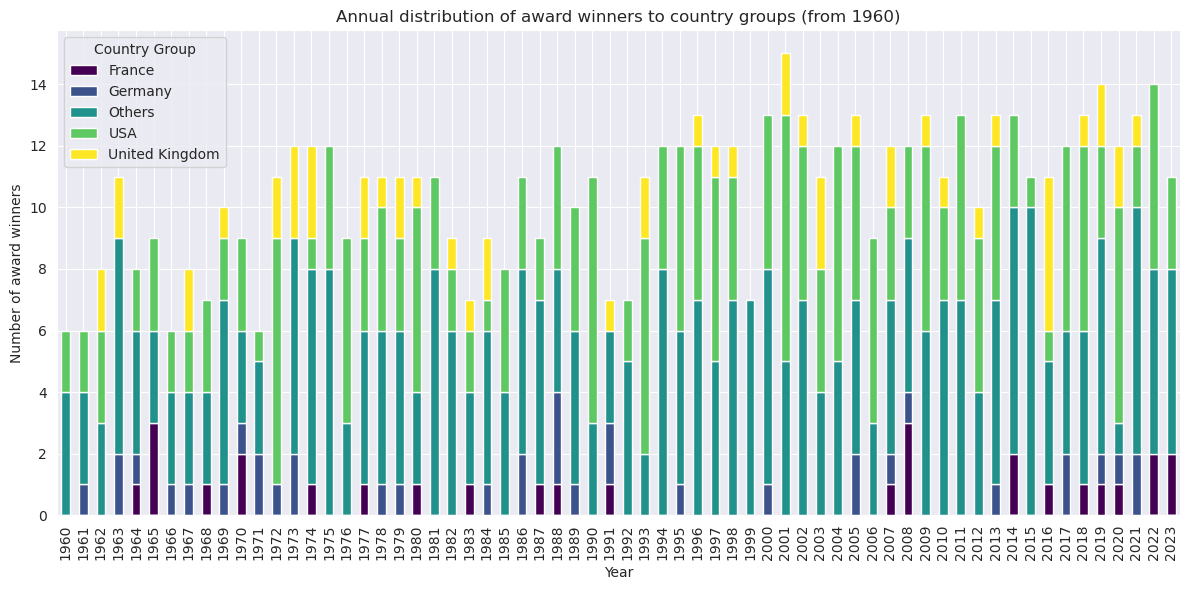

In [7]:
## Erstellen Sie ein gestapeltes Balkendiagramm, welches für jedes im DataFrame 'df_nobelp_tmp' enthaltene Jahr ab inkl. 1960
## die Anzahl an Preisträger:innen (inkludiert Personen sowie Organisationen) darstellt. Die Preisträger:innen sollen dabei unter 
## Verwendung des Merkmals 'CountryGroup' (NICHT 'Born country'!) nach ihrem Geburtsland gruppiert dargestellt werden 
## (gestapelt - also ein Balken pro Jahr, welcher die Preisträger:innen nach dem Geburtsland unterschieden enthält).
##
## Die DataFrames 'df_nobelp' und 'df_nobelp_tmp' dürfen nicht verändert werden.
## Wenn Sie die Daten vor der Visualisierung aufbereiten wollen/müssen, dann erstellen Sie dazu bitte ein neues DataFrame.
##
## Lösen Sie diese Aufgabe mittels matplotlib/Pandas - NICHT mittels Seaborn

df_nobelp_grouped = df_nobelp_tmp.copy()
df_nobelp_grouped = df_nobelp_grouped.groupby(['Year', 'CountryGroup']).size().unstack(fill_value=0)

plt.rcParams["figure.figsize"] = (22,8)  # Größe der Grafik - kann angepasst werden.

df_nobelp_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Annual distribution of award winners to country groups (from 1960)')
plt.xlabel('Year')
plt.ylabel('Number of award winners')
plt.legend(title='Country Group')
plt.tight_layout()
plt.show()

In [8]:
# Checks zum DataFrame df_nobelp_tmp

control_group = list(df_nobelp["Born country"].value_counts().head(4).index) + ['Others']

assert len(df_nobelp_tmp.columns) == 20, f'Unerwartete Anzahl an Spalten für df_nobel_tmp: {len(df_nobelp_tmp.columns)} statt 20'
assert df_nobelp_tmp["CountryGroup"].isin(control_group).all(), 'Merkmal "CountryGroup" enthält unerwartete Einträge'
assert (df_nobelp_tmp[df_nobelp_tmp["Born country"] == 'USA']["CountryGroup"] == 'USA').all(), 'Merkmal "CountryGroup" enthält unerwartete Einträge für Zeile mit Born country == USA'



## Sterne: Sternentyp klassifizieren

In Übungsblatt 4 hatten wir erwähnt, dass es basierend auf den vorliegenden Informationen die naheliegenste Aufgabe wäre, die Sterne nach ihrem Typ (__Star type__) zu klassifizieren. Damals haben wir das nicht getan, werden aber versuchen nun mittels einer Visualisierung Regeln für eine passende Klassifikation zu finden. 

Wir verwenden den unveränderten Datensatz von Aufgabenblatt 4, werden jedoch als ersten Schritt gleich nach dem Laden der Daten die Kodierung des Sternentyps als Zahl durch einen entsprechenden Namen ersetzen.

In [9]:
df_stars = pd.read_csv(src_stars, delimiter=',')

# Klassennamen laut Quelle:
star_type = {0: 'Brown Dwarf',
             1: 'Red Dwarf',
             2: 'White Dwarf',
             3: 'Main Sequence',
             4: 'Supergiant',
             5: 'Hypergiant'}
df_stars["Star type"] = df_stars["Star type"].apply(lambda x: star_type[x])
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


Wie bereits beschrieben ist unser Ziel, die Sternentypen auseinanderhalten zu können. Dafür betrachten wir die Verteilung einiger Merkmale mittels Boxplots.

<Axes: xlabel='Absolute magnitude(Mv)', ylabel='Star type'>

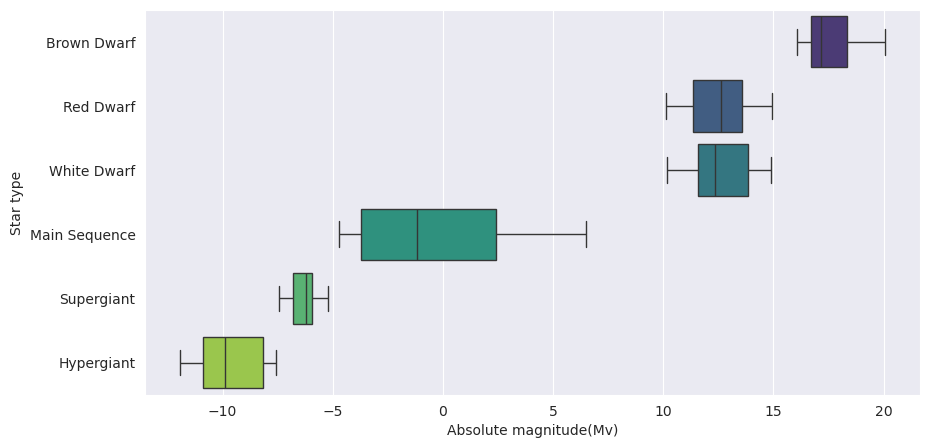

In [10]:
## Erstellen Sie einen Plot mit einem Boxplot welcher die Werte des Merkmals *Absolute magnitude(Mv)* für jeden Sternentyp
## visualisiert (gesucht ist also eine "Box" pro Sternentyp, in Summe 6 Boxen; jede visualisiert die Verteilung der Werte 
## von 'Absolute magnitude(Mv)' für die Sterne dieser Klasse).
## Färben Sie außerdem jede Box in einer anderen Farbe ein.
## Basieren Sie die Darstellung auf den Daten in 
##    'df_stars'
## Lassen Sie das DataFrame 'df_stars' unverändert. Sollten Sie die Daten vor dem Plotten aufbereiten 
## wollen, verwenden Sie wiederum ein neues DataFrame/eine neue Datenstruktur.

plt.rcParams["figure.figsize"] = (10,5)  # frei wählbar

class_name = "Star type"
indi_name = "Absolute magnitude(Mv)"

unique_classes = pd.unique(df_stars[class_name])

palette = sns.color_palette("viridis", len(unique_classes))
palette_dict = dict(zip(unique_classes, palette))

sns.boxplot(data=df_stars, x=indi_name, y=class_name, hue=class_name, palette=palette_dict)

In [11]:
# Dummy zur Abbildung der Bewertung


Laut dieser Visualisierung, können wir (zumindest für die vorhandenen Daten) die meisten Sternentypen bereits anhand der Werte für die 'Absolute magnitude' unterscheiden. Nur für zwei Arten von Sternen geht das nicht (Red Dwards und White Dwarfs). Wir suchen mit der selben Methode nach einem weiteren Merkmal, welches es uns erlaubt diese beiden Klassen zu trennen

<Axes: xlabel='Temperature (K)', ylabel='Star type'>

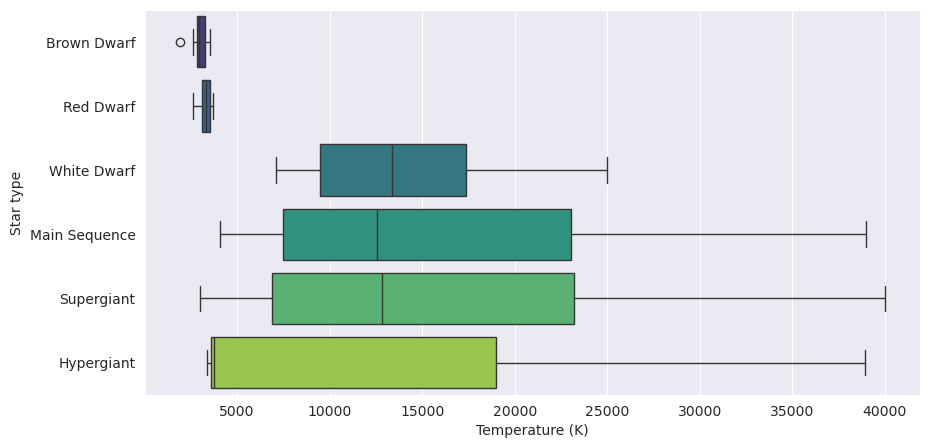

In [12]:
## Erstellen Sie einen Plot mit einem Boxplot welcher die Werte des Merkmals *Temperature (K)* für jeden Sternentyp
## visualisiert (gesucht ist also eine "Box" pro Sternentyp, in Summe 6 Boxen; jede visualisiert die Verteilung der Werte 
## von 'Temperature (K)' für die Sterne dieser Klasse).
## Färben Sie außerdem jede Box in einer anderen Farbe ein.
## Achten Sie darauf, dass sowohl die Reihenfolge der Boxen (Sternentypen) als auch die Farben der Boxen ident 
## mit der Wahl im vorherigen Boxplot ist (wir möchten leicht erkennen können, wie die Boxen in den beiden Grafiken
## zusammenpassen).
## 
## Basieren Sie die Darstellung auf den Daten in 
##   'df_stars'
## Lassen Sie das DataFrame 'df_stars' unverändert. Sollten Sie die Daten vor dem Plotten aufbereiten 
## wollen, verwenden Sie wiederum ein neues DataFrame/eine neue Datenstruktur.

plt.rcParams["figure.figsize"] = (10,5) # frei wählbar

class_name = "Star type"
indi_name = "Temperature (K)"

sns.boxplot(data=df_stars, x=indi_name, y=class_name, hue=class_name, palette=palette_dict)

Dieses Merkmal trennt die Klassen 'Red Dwarf' und 'White Dwarf' voneinander, wodurch wir einen Algorithmus zur Klassifizierung ableiten können. Wir werden diesen hier jedoch nicht weiter evaluieren. Das Vorgehen soll nur demonstrieren, dass manchmal bereits eine visuelle Aufbereitung der Daten zumindest Lösungsansätze für bestimmte Probleme der Datenanalyse bieten kann.

Bevor wir zum nächsten Datensatz weitergehen erstellen wir noch eine Grafik, welche helfen soll, Boxplots besser zu verstehen. Dazu überlagern wir einen Boxplot mit der Visualisierung der tatsächlichen Verteilung der einzelnen Werte (als Swarmplot). Da er eine interessante (unregelmäßige) Form aufweist, wählen wir für diese Aufgabe den Boxplot der Klasse __Hypergiant__ in der letzten Grafik, also zum Merkmal __Temperature (K)__. Überlegen Sie sich zuerst, wie die Verteilung der Datenpunkte über dem Boxplot aussehen müsste, um die Form des Plots zu erzeugen. Erstellen Sie erst im Anschluss die entsprechende Grafik, und überprüfen Sie ob Ihre Annahme korrekt war (keine Antwort diesbezüglich notwendig).

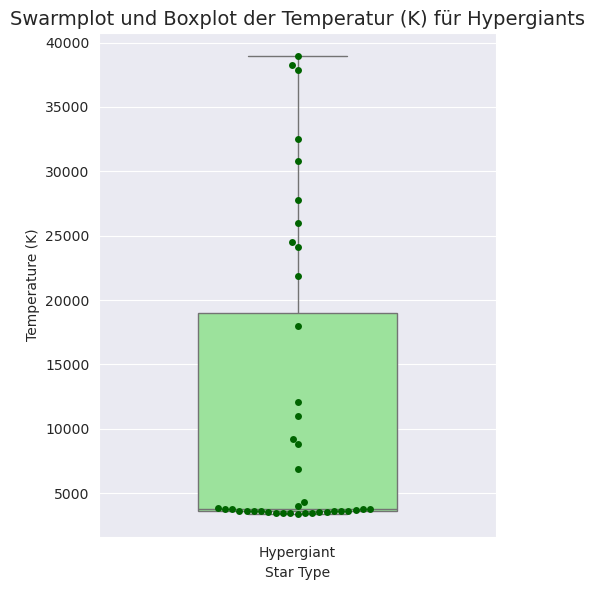

In [13]:
## Erstellen Sie eine Grafik, in welcher sich ein Swarmplot und ein Boxplot des Merkmals 
##    Temperature (K)
## für die Sterne der des Typs "Hypergiant" überlagen. 
## 
## Beide Plots sollen jeweils die Werte dieses Merkmals für diese Sternenart beinhalten.
## 
## Achten Sie bei der Überlagerung (mittels der Verwendung von alpha-Werten) darauf, dass beide plots gut 
## erkennbar sind.
##
## Das DataFrame 'df_stars' darf nicht verändert werden.

plt.rcParams["figure.figsize"] = (5,6)  # kann nach Bedarf angepasst werden

df_hypergiant = df_stars[df_stars[class_name] == 'Hypergiant']
sns.boxplot(data=df_hypergiant, x=class_name, y=indi_name, width=0.5, color='lightgreen', showfliers=False,  zorder=1)
sns.swarmplot(data=df_hypergiant, x=class_name, y=indi_name, color='darkgreen', size=5, zorder=2)

plt.title('Swarmplot und Boxplot der Temperatur (K) für Hypergiants', fontsize=14)
plt.xlabel('Star Type')
plt.ylabel('Temperature (K)')

plt.tight_layout()
plt.show()

In [14]:
# Dummy zur Abbildung der Bewertung


## Household Power Consumption

Diesen Datensatz verwenden wir unverändert wieder, so wie wir ihn am Übungsblatt 4 gesehen haben. Im Rahmen des 4.Übungsblattes haben wir festgestellt, dass nicht nur der Gesamtstromverbrauch des Hauses im Laufe des Tages variiert, sondern dass sich auch die Verteilung zwischen den unterschiedlichen Sub-Zählern (für Küche, Waschküche und Warmwasser/Heizung) verändert. 

Wir untersuchen den Verlauf dieser Verteilung anhand zweier Visualisierungen.

In [15]:
df_power = pd.read_csv(src_power, sep=';')
df_power

,Timeslot,Global_active_power,Global_intensity,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0:0,0.750668,3.180533,0.118198,0.502665,0.686816,3.376578
1,0:5,0.743238,3.152174,0.118691,0.501122,0.709537,3.343619
2,0:10,0.718387,3.046564,0.117895,0.524544,0.637307,3.157504
3,0:15,0.696471,2.957195,0.117606,0.506311,0.617672,2.979383
4,0:20,0.674884,2.870194,0.116558,0.338058,0.616054,2.961970
...,...,...,...,...,...,...,...
283,23:35,0.844640,3.553296,0.117505,0.834642,0.732679,3.794670
284,23:40,0.819520,3.451697,0.117121,0.632118,0.698878,3.719355
285,23:45,0.807115,3.403338,0.118464,0.708135,0.668163,3.714306
286,23:50,0.789015,3.331725,0.116817,0.765358,0.624404,3.595372


Zuerst visualisieren wir den an den drei Zählern gemessenen Stromverbrauch im Tagesverlauf als Heatmap.

<Axes: >

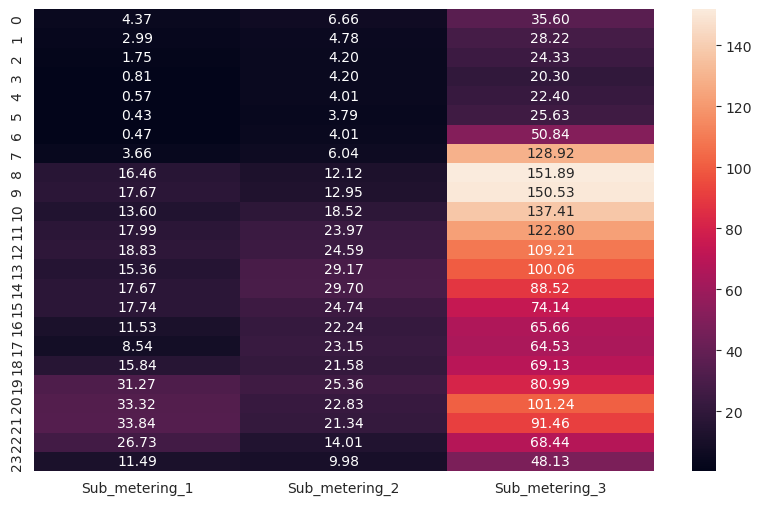

In [16]:
## Erstellen Sie eine Heatmap, welche für jeden der drei Sub-Zähler 
## (sub_metering_1, sub_metering_2, sub_metering_3) für jede Stunde 
## den gemessenen Energieverbrauch darstellt. 
## 
## D.h. die Heatmap sollte 3 Spalten haben (eine für jeden Subzähler), 
## und 24 Zeilen (eine für jede Stunde des Tages; 0-23). Der Wert eines Eintrags 
## stellt die Summe der gemessenen Verbrauchswerte für den Zähler in dieser 
## Stunde dar. 
##
## Die Felder der Matrix der Heatmap sollen die Summe der Werte des jeweiligen 
## Zählerstandes für die jeweilige Stunde *auf 2 Nachkommastellen genau* 
## enthalten.
## 
## Das DataFrame 'df_power' darf nicht verändert werden.
##
## Hinweis: Zum Lösen der Aufgabe müssen zuerst die Einträge in 'df_power' 
## nach den Stunden aggregiert werden. Ein mögliches Vorgehen ist parallel 
## zum Anlegen der Bundesländer aus den politischen Bezirken im 1. Übungsblatt:
## - extrahieren Sie zuerst aus dem Timeslot (Werte sind Strings) die Stunde 
##   (also den Wert vor dem ':')
## - Gruppieren Sie die Einträge dann nach den Stunden, und aggregieren Sie 
##   die Werte für jeden Subzähler durch Summenbildung. (Pivot-Tabelle)
## - Die Stunden von Strings in Zahlen umzuwandeln kann bei der korrekten 
##   Sortierung für die Visualisierung helfen.

plt.rcParams["figure.figsize"] = (10,6)  # kann nach Bedarf angepasst werden

subs = ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

df_heatmap = df_power.groupby(df_power.index // 12).sum()
df_heatmap.drop(columns=['Timeslot', 'Global_active_power', 'Global_intensity', 'Global_reactive_power'], inplace=True)
sns.heatmap(df_heatmap, annot=True, fmt=".2f")

In [17]:
# Dummy zur Abbildung der Bewertung


Zum Abschluss greifen wir uns vier Zeitfenster aus dem Tag heraus, und visualisieren für diese Zeitfenster einmal den Anteil jedes Subzählers am Gesamtenergieverbrauch (ACHTUNG! Wir betrachten die Summe der drei Subzähler als Gesamtenergiebrauch, __nicht__ irgendwelche anderen Merkmale von ```df_power```) sowie einmal den tatsächlich gemessenen (absoluten) Energieverbrauch pro Subzähler. 

In [18]:
## Erstellen Sie eine neues DataFrame, welches neben den Merkmalen 
##   "Timeslot", "Sub_metering_1", "Sub_metering_2" und "Sub_metering_3"
## aus 'df_power' die folgenden 4 Merkmale besitzt:
## - "Summe": Die Summe der Werte in "Sub_metering_1", "Sub_metering_2" und "Sub_metering_3"
## - "Sub_metering_1_%": Den Anteil von "Sub_metering_1" am Gesamtenergieverbrauch (= der Wert in "Summe") in %
## - "Sub_metering_2_%": Analog zu "Sub_metering_1_%"
## - "Sub_metering_3_%": Analog zu "Sub_metering_1_%"
##
## Das DataFrame soll die Einträge für die Zeitfenster (Timeslot) um 
## - 17:30 
## - 19:30 
## - 20:15 
## - 22:30 
## enthalten (Die Werte für 
##   "Timeslot", "Sub_metering_1", "Sub_metering_2" und "Sub_metering_3"
## werden aus 'df_power' übernommen, die restlichen entsprechend berechnet.)
## 
## Speichern Sie eine Referenz auf das neue DataFrame in einer Variablen 
##  'df_pselection'
## Das Dataframe 'df_power' darf nicht verändert werden.

subs = ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
selected_times = ['17:30', '19:30', '20:15', '22:30']
df_pselection = df_power[df_power['Timeslot'].isin(selected_times)].drop(columns=['Global_active_power', 'Global_intensity', 'Global_reactive_power'])
df_pselection = df_pselection.assign(Summe=df_pselection[subs].sum(axis=1))
df_pselection["Sub_metering_1_%"] = df_pselection["Sub_metering_1"]/df_pselection["Summe"] * 100
df_pselection["Sub_metering_2_%"] = df_pselection["Sub_metering_2"]/df_pselection["Summe"] * 100
df_pselection["Sub_metering_3_%"] = df_pselection["Sub_metering_3"]/df_pselection["Summe"] * 100
df_pselection

,Timeslot,Sub_metering_1,Sub_metering_2,Sub_metering_3,Summe,Sub_metering_1_%,Sub_metering_2_%,Sub_metering_3_%
210,17:30,0.570907,1.908082,5.437948,7.916936,7.211206,24.101262,68.687532
234,19:30,2.781767,2.501964,6.651052,11.934783,23.308067,20.963629,55.728304
243,20:15,2.355431,1.688998,8.425648,12.470077,18.888664,13.544406,67.566930
270,22:30,2.270903,1.076599,5.541526,8.889029,25.547261,12.111551,62.341188


In [19]:
assert df_pselection is not None, 'df_pselection nicht definiert?'
assert type(df_pselection) == pd.DataFrame, 'df_pselection ist kein DataFrame?'

full_header = ['Sub_metering_1', 'Sub_metering_1_%', 'Sub_metering_2', 'Sub_metering_2_%', 'Sub_metering_3', 'Sub_metering_3_%', 'Summe', 'Timeslot']

assert sorted(df_pselection.columns) == full_header,  \
        f'df_pselection hat unerwartete Merkmale: {sorted(df_pselection.columns)}'
assert len(df_pselection) == 4, f'df_pselection hat unerwartete Anzahl an Einträgen: {len(df_portfolio)} statt 4'

assert np.allclose(list(df_pselection[df_pselection["Timeslot"] == '19:30'][["Sub_metering_1_%", "Sub_metering_2_%", "Sub_metering_3_%"]].values), [23.308067454021977, 20.963628885363416, 55.72830366061461]), \
        list(df_pselection[df_pselection["Timeslot"] == '19:30'][["Sub_metering_1_%", "Sub_metering_2_%", "Sub_metering_3_%"]].values)
assert abs(df_pselection[df_pselection["Timeslot"] == '22:30']["Summe"].values[0] - 8.889029) < 0.001, f'Unerwartete Summe: {df_pselection[df_pselection["Timeslot"]=="22:30"]["Summe"]}'



[Text(0, 0, '17:30'),
 Text(0, 1, '19:30'),
 Text(0, 2, '20:15'),
 Text(0, 3, '22:30')]

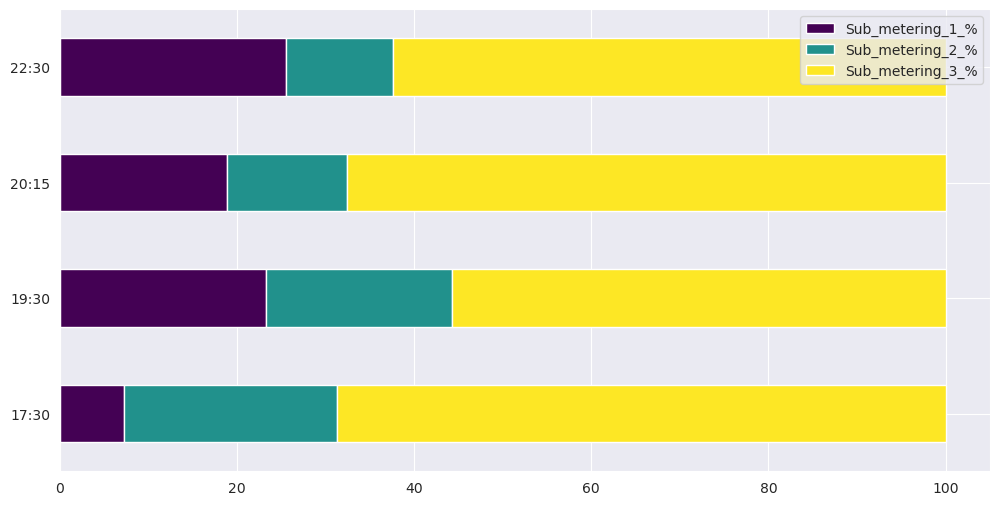

In [20]:
## Erstellen Sie ein Balkendiagramm mit vier horizontalen, gestapelten Balken - jeweils ein
## Balken für jeden Timeslot in 'df_pselection'
## Jeder Balken zeigt den Anteil (in Prozent) der drei Subzähler an der Summe der durch 
## die Subzähler gemessenen Energiemenge in dem jeweiligen Timeslot an.
##
## Die Sortierung der Abschnitte innerhalb eines Balkens soll der Reihenfolge 
##  "Sub_metering_1", "Sub_metering_2" und "Sub_metering_3"
## entsprechen.
## Die vier Balken selber sollen zeitlich aufsteigend sortiert sein, d.h. der oberste
## Balken entspricht dem Timeslot um 17:30, der unterste dem Slot um 22:30 Uhr.
## Die Beschriftung der y-Achse soll die Zeitslots, nicht die ursprünglichen Indexwerte 
## (210, 234, ...) enthalten.
##
## Achten Sie darauf, dass die Einheit der Länge der Balken Prozent (egal ob als Werte
## von 0 bis 1 oder 0 bis 100) ist, und *nicht* die gemessene Energiemenge.
## 
## Achten Sie auf eine einheitliche Darstellung der Balken.
##
## Das DataFrame 'df_power' darf nicht verändert werden, Änderungen am DataFrame 
## 'df_pselection' sind erlaubt.

plt.rcParams["figure.figsize"] = (12,6)  # kann nach Bedarf angepasst werden

fig, ax = plt.subplots(figsize=(12, 6))

df_pselection[["Sub_metering_1_%", "Sub_metering_2_%", "Sub_metering_3_%"]].plot(
    kind="barh", stacked=True, ax=ax, colormap="viridis"
)

ax.set_yticks(range(len(df_pselection)))
ax.set_yticklabels(df_pselection["Timeslot"])

In [21]:
# Dummy zur Abbildung der Bewertung


[Text(0, 0, '17:30'),
 Text(0, 1, '19:30'),
 Text(0, 2, '20:15'),
 Text(0, 3, '22:30')]

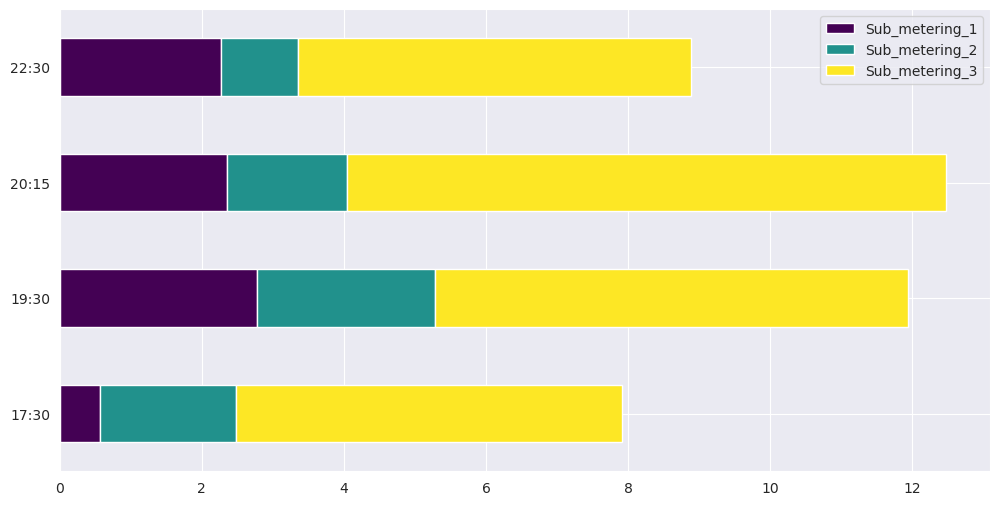

In [22]:
## Erstellen Sie ein Balkendiagramm nach den selben Regeln wie zuvor, jedoch soll nun jeder 
## Balken den tatsächlich gemessenen Energieverbrauch jedes Subzählers darstellen. 
## (Die Einheit auf der x-Achse sind nun also Wattstunden)
## 
## Alle anderen Anforderungen (Sortierung, ...) bleiben erhalten - und achten Sie darauf 
## dass die Balken der Subzähler in den selben Farben wie zuvor eingefärbt werden.
##
## Das DataFrame 'df_power' darf nicht verändert werden, Änderungen am DataFrame 
## 'df_pselection' sind erlaubt.
##
## Die Einheit der Merkmale 
##  "Sub_metering_1", "Sub_metering_2" und "Sub_metering_3"
## sind Wattstunden

plt.rcParams["figure.figsize"] = (12,6)  # kann nach Bedarf angepasst werden

fig, ax = plt.subplots(figsize=(12, 6))

df_pselection[subs].plot(
    kind="barh", stacked=True, ax=ax, colormap="viridis"
)

ax.set_yticks(range(len(df_pselection)))
ax.set_yticklabels(df_pselection["Timeslot"])

In [23]:
# Dummy zur Abbildung der Bewertung


## Wohnungsbau in Österreich

Im 3. Übungsblatt haben wir uns den Zusammenhang zwischen der Anzahl an Genehmigungen zum Bau neuer Wohnungen und der Anzahl an Fertigstellungen neuer Wohnungen angesehen, und daraus ein Regressionsmodell gebildet. Wir werden nun einerseits die durch die Regression ermittelte Anzahl an fertiggestellten Wohnungen den tatsächlichen Fertigstellungen grafisch gegenüberstellen. Zuvor visualisieren wir aber noch die Entwicklung der Anzahl an Genehmigungen und Fertigstellungen über die Zeit.

Der Datensatz ist gleich aufgebaut wie jener von Übungsblatt 3. Jedoch haben sich die Werte für die lezten Jahre leicht geändert: Wir verwenden die aktuelleren Werte von [hier (wiederum die Statistik Austria, diesmal aber die ein Jahr später veröffentlichten Daten)](https://www.statistik.at/fileadmin/pages/353/Whg05-23_Bdl_150924.ods). Bis inkl. 2020 sind die Werte für die Fertigstellungen ident, für die darauf folgenden Jahre wurden die Werte jedoch teils deutlich nach unten korrigiert (z.B. für 2023 von rund 77000 auf 70000). Das liegt daran, dass die vollständige Erfassung aller Fertigstellungen Zeit benötigt, und die Werte daher erst einmal nur aufgeschätzt werden.

Für die Ergebnisse im Datensatz `WohnungsbauPredictions.csv` hat dies keine Auswirkungen, da wir hierfür ohnehin nur bis inkl. 2020 gearbeitet haben. 

In [24]:
df_flats = pd.read_csv(src_flats, delimiter=',')  # der bekannte Datensatz aus Übung 3
df_regression_results = pd.read_csv(src_flats_predictions, sep=';')  # Die Ergebnisse für die multilineare Regression in Übung 3 (DataFrame df_merror).
df_flats

,Jahr,Fertigstellung,Bewilligung
0,1980,73251,42334
1,1981,47345,41292
2,1982,40847,37516
3,1983,35918,36958
4,1984,37645,36263
5,1985,37317,30568
6,1986,34616,28483
7,1987,34289,30338
8,1988,34893,30348
9,1989,32858,31946


Wir beginnen, indem wir eine Grafik reproduzieren die sich in einigen Berichten zur Wohnungssituation in Österreich wiederfindet: Eine Gegenüberstellung der Bewilligungen und Fertigstellungen über die Zeit als Lineplot.

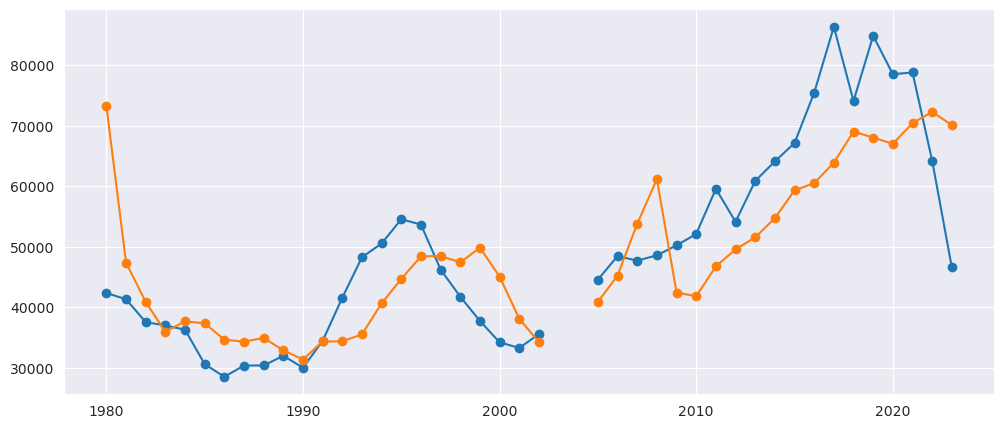

In [25]:
## Erstellen Sie mittels pandas/matplotlib (nicht seaborn!) einen LinePlot, welcher den zeitlichen Verlauf 
## der Anzahl sowohl an Bewilligungen für neue Wohnungen als auch an fertiggestellten Wohnungen zeigt.
## Der Verlauf soll die in 'df_flats' enthaltenen Jahre darstellen. 
## 
## Achtung! Es fehlen die Daten zu den Jahren 2003 und 2004. Dies soll durch eine entsprechende Lücke 
## im Linegraph dargestellt werden. (Hinweis: fehlende Werte (NaN) werden beim Plotten nicht dargestellt.)
## 
## Plotten Sie die Daten aus dem DataFrame 'df_flats'. Verändern Sie das DataFrame *nicht* - sollten
## zusätzliche Berechnungen notwendig sein können Sie gerne ein neues DataFrame anlegen.
## 
## Zusätzliche Vorgaben
## - Achten Sie auf die Beschriftungen
## - Markieren Sie die tatsächlichen Datenpunkte mit einem Symbol Ihrer Wahl, um hervorzuheben welche Stellen für tatsächlich 
##   gezählte  Werte stehen und welche für die Verbindungslinien. (Symbol muss sichtbar sein).
## - Der Lineplot soll den *zeitlichen Verlauf* abbilden und *alle* Jahre zwischen 1980 und 2023 (inkl.) beinhalten.
## - Annotieren Sie die Grafik in der Lücke für die Jahre 2003 und 2004 mit dem Text "keine Daten verfügbar" 
##   (rotieren Sie den Text um 90 Grad, so dass er in die Lücke passt)

plt.rcParams["figure.figsize"] = (12,5)

jahr = df_flats['Jahr'].to_numpy()
bewilligung = df_flats['Bewilligung'].to_numpy()
fertigstellung = df_flats['Fertigstellung'].to_numpy()

missing_years = [2003, 2004]

new_jahr = np.sort(np.concatenate([jahr, missing_years]))
new_bewilligung = np.full_like(new_jahr, np.nan, dtype=float)
new_fertigstellung = np.full_like(new_jahr, np.nan, dtype=float)

existing_indices = np.isin(new_jahr, jahr)
new_bewilligung[existing_indices] = bewilligung
new_fertigstellung[existing_indices] = fertigstellung

plt.plot(new_jahr, new_bewilligung, marker="o")
plt.plot(new_jahr, new_fertigstellung, marker="o")

In [26]:
# Dummy zur Abbildung der Bewertung


Zur Erinnerung: Der Inhalt des DataFrames `df_regression_results`

In [27]:
df_regression_results

,Jahr,Fertigstellung,Vorhersage,Abweichung,Prozent
0,1984,37645,39029.019316,1384.019316,3.676502
1,1985,37317,37885.330619,568.330619,1.522980
2,1986,34616,35554.948678,938.948678,2.712470
3,1987,34289,33911.814426,-377.185574,-1.100019
4,1988,34893,33463.038168,-1429.961832,-4.098134
5,1989,32858,32042.307793,-815.692207,-2.482477
6,1990,31335,31075.795766,-259.204234,-0.827204
7,1991,34312,32574.314076,-1737.685924,-5.064368
8,1992,34334,33221.284871,-1112.715129,-3.240855
9,1993,35494,36466.625864,972.625864,2.740254


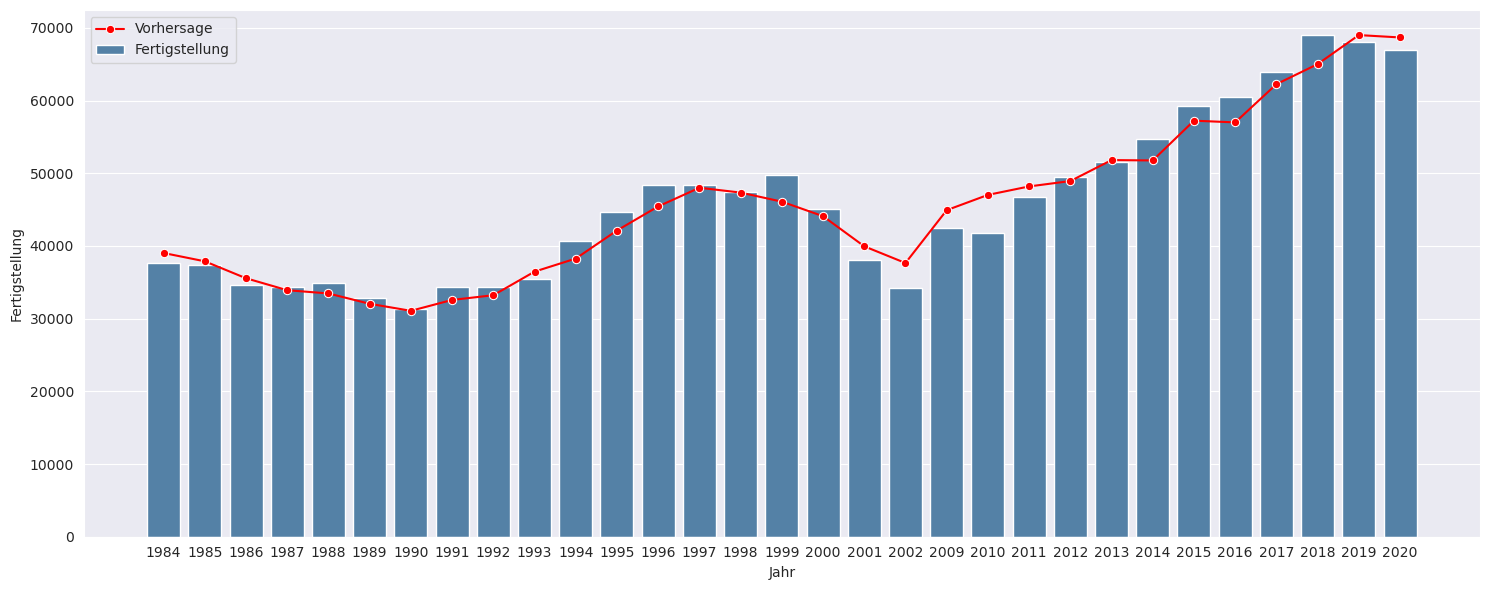

In [28]:
## Erstellen Sie mittels Seaborn ein Balkendiagramm, welches die Anzahl der tatsächlichen 
## Baufertigstellungen (*Fertigstellung*) über die Jahre abbildet. 
## Das Diagramm soll auf den Werten in 
##   'df_regression_results'
## basieren und einen Balken für jedes darin enthaltene Jahr besitzen.
## 
## Die Lücke für die Jahre 2003-2008 darf ignoriert werden, d.h. die Balken für die Jahre 
## 2002 und 2009 dürfen direkt nebeneinander stehen. 
##
## Zeichnen Sie in die selbe Grafik mittels Matplotlib/Pandas einen Linegraph 
## (d.h. der Linegraph soll das Balkendiagramm überlagern), 
## welcher den Verlauf der durch das Modell vorhergesagten Fertigstellungen (*Vorhersage*) abbildet. 
## Färben Sie die Linie und die Balken in gut unterscheidbaren Farben so ein, dass 
## der Lineplot gut erkennbar ist. Markieren Sie im Lineplot außerdem die tatsächlichen 
## Werte mit einem x. 
## Auch für den Lineplot darf die Lücke für die Jahre 2003-2008 wiederum ignoriert werden, d.h. 
## der Wert für 2002 darf mit jenem von 2009 verbunden werden. 

plt.rcParams["figure.figsize"] = (15,6)

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(15,6))

p1 = sns.barplot(data=df_regression_results, x='Jahr', y='Fertigstellung', color='steelblue', label='Fertigstellung', ax=ax1)
p2 = sns.lineplot(data=df_regression_results, x=ax1.get_xticks(), y='Vorhersage',color='red', marker='o', label='Vorhersage', ax=ax1)

fig.tight_layout()

In [29]:
# Dummy zur Abbildung der Bewertung


## Getränke 

Wir verwenden den unveränderten Datensatz von Übungsblatt 1. 

In [30]:
df_drinks = pd.read_csv(src_drinks, delimiter=',')
df_drinks

,Drink,Volume (ml),Calories,Caffeine (mg),Type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


Wir beginnen mit einer Visualisierung der Koffeinkonzentration (also mg Koffein pro 100ml Getränk) für die Getränke des Typ "Energy Shots". 

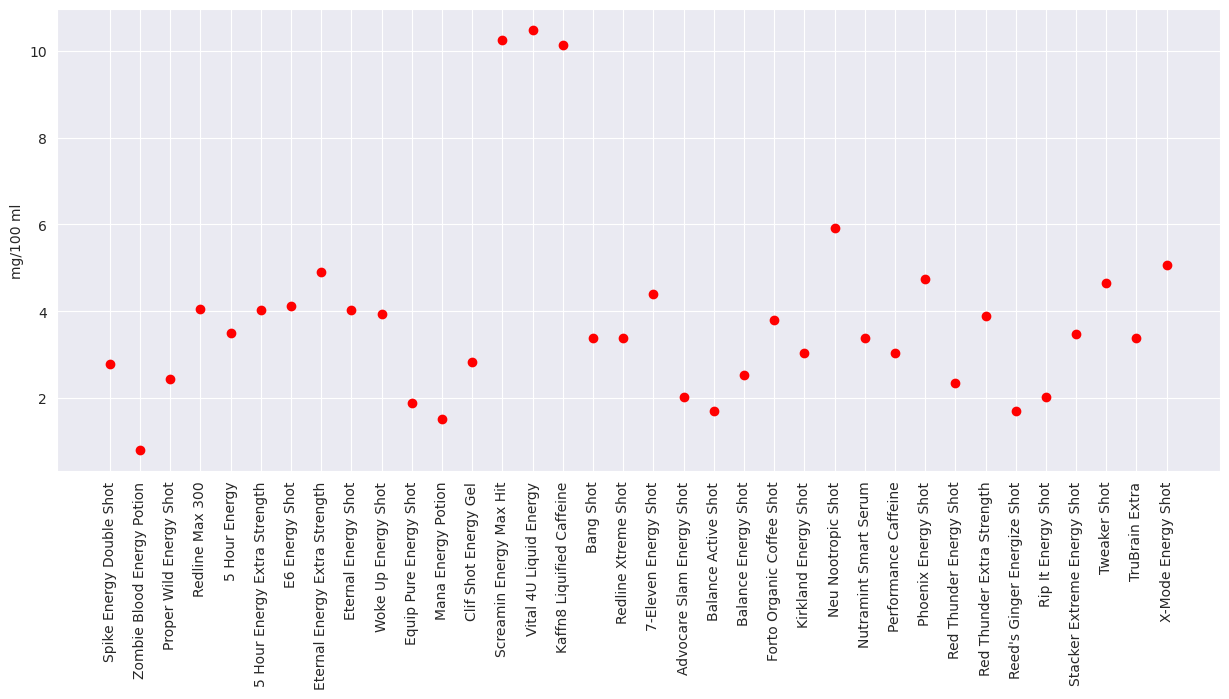

In [31]:
## Erstellen Sie ein Punktdiagramm, welches jedem Getränk vom Typ 'Energy Shots' seine Koffeinkonzentration gegenüberstellt.
## Die Koffeinkonzentration soll in der Einheit "mg/100 ml" dargestellt werden (die Gesamtmenge an Koffein ist in mg angegeben,
## das Volumen der Verpackungen in ml).
##
## Achten Sie auf eine korrekte Darstellung des Diagramms.
## Sollten Sie die Daten vor dem Plotten noch aufbereiten wollen (z.B. zur Berechnung der Konzentration), achten Sie darauf 
## das DataFrame 'df_drinks' *nicht* zu verändern.
## Sie dürfen nach Bedarf jederzeit zusätzliche DataFrames anlegen. 

plt.rcParams["figure.figsize"] = (15,6)

df_plot_drinks = df_drinks[df_drinks["Type"] == 'Energy Shots']

plt.plot(df_plot_drinks["Drink"], df_plot_drinks["Caffeine (mg)"]/df_plot_drinks["Volume (ml)"], color='red', marker='o',linestyle='')
plt.ylabel("mg/100 ml")
plt.xticks(rotation=90)
plt.show()

In [32]:
# Dummy zur Abbildung der Bewertung


Als nächstes schlüpfen wir in die Rolle eines Consulting-Unternehmens: _Der Verband der Soft-Drink Hersteller ist in Aufruhr. Eine aktuelle Analyse hat ergeben, dass der Marktanteil von Soft-Drinks an Verkäufen im Marktsegment von Getränken unter 333ml weit unter dem Gesamtmarktanteil von Soft-Drinks liegt. Er beauftragt Sie, Gründe dafür zu identifizieren. Sie werfen einen kurzen Blick auf das Angebot an Soft-Drinks, und erstellen folgende Grafik für ihr nächstes Meeting:_

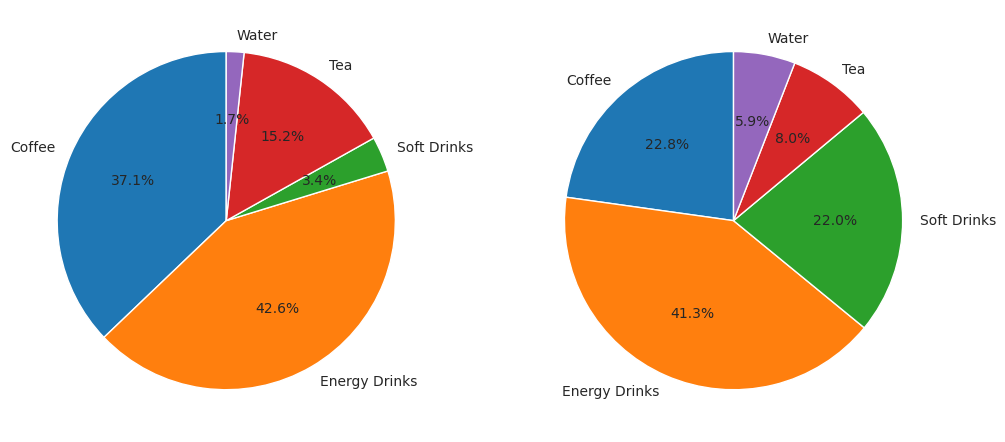

In [33]:
## Erstellen Sie ein neues DataFrame als Kopie von 'df_drinks'.
## Fassen Sie in diesem DataFrame die Getränketypen "Energy Drinks"
## und "Energy Shots" zum Typ "Energy Drinks" zusammen. 
##
## Visualisieren Sie anschließend für alle Getränke mit weniger als 
## 333ml die Anzahl an Getränken jeden Typs mittels eines Kreisdiagramms.
## Stellen Sie dabei den Anteil (in %) des jeweiligen Getränketyps an der Gesamtanzahl 
## an Getränken mit weniger als 333ml dar.
## 
## Visualisieren Sie anschließend die Verteilung der Getränke mit 333ml oder 
## mehr auf die jeweiligen Getränketypen - nach den selben Ideen wie zuvor 
## für die Getränke < 333ml.
## 
## Die Kreisdiagramme sollen also jeweils den prozentuellen Anteil 
## jedes Getränketyps (nach Zusammenfassung von "Energy Drinks" und 
## "Energy Shots") an der Gesamtanzahl an angebotenen Getränken mit 
## weniger bzw. mindestens 333ml darstellen.
##
## Die Diagramme sollen auch die Prozentzahlen (0-100) enthalten, welche auf 
## zwei Nachkommastellen genau angegeben werden.
## Die Abschnitte sollen nach den Getränketypen benannt sein.
## 
## Das DataFrame 'df_drinks' darf nicht verändert werden

plt.rcParams["figure.figsize"] = (12,6)

df_new_drinks = df_drinks.copy()
df_new_drinks["Type"] = df_new_drinks["Type"].replace("Energy Shots", "Energy Drinks")

# plot 1
df_plot_1 = df_new_drinks[df_new_drinks["Volume (ml)"] < 333]
df_plot_1 = df_plot_1.groupby("Type", as_index=False).count()
df_plot_1.drop(columns=["Volume (ml)", "Calories", "Caffeine (mg)"], inplace=True)

#plot 2
df_plot_2 = df_new_drinks[df_new_drinks["Volume (ml)"] >= 333]
df_plot_2 = df_plot_2.groupby("Type", as_index=False).count()
df_plot_2.drop(columns=["Volume (ml)", "Calories", "Caffeine (mg)"], inplace=True)

plt.subplot(1, 2, 1)
plt.pie(df_plot_1['Drink'], labels=df_plot_1["Type"], autopct='%1.1f%%', startangle=90)
plt.subplot(1,2,2)
plt.pie(df_plot_2['Drink'], labels=df_plot_2["Type"], autopct='%1.1f%%', startangle=90)

plt.show()

In [34]:
# Dummy zur Abbildung der Bewertung


Warum könnte der Anteil von _verkauften_ Softdrinks mit einer Packungsgröße unter 333ml Inhalt kleiner sein als der Anteil an verkauften Softdrinks mit mindestens 333ml? (Keine Antwort erforderlich)

_Der Verband der Soft-Drink Hersteller ist von Ihrer Marktanalyse begeistert, setzt 4 Arbeitsgruppen zur Ausarbeitung von Strategien zur Entwicklung einer Roadmap für die Erstellung eines Plans zu Verbesserung der Situation ein, stellt Ihnen eine großen Scheck aus, und Sie fahren erst einmal lange auf Urlaub._

## Portfolio Entwicklung

Wir verwenden den unveränderten Datensatz mit den wirtschaftlichen Kenngrößen von Übungsblatt 2. Jedoch nehmen wir nun an, wir würden ein Anlageportfolio besitzen. Dieses Portfolio enthält 

- Gold
- S&P 500 Aktienindex
- Rohöl

Dabei nehmen wir an, dass die im Datensatz angegebenen Preise sich auf jeweils 1 Unze Gold, 1 Anteilschein am Aktienindex des S&P 500, sowie 1 Barrel Rohöl beziehen.

Unser imaginäres Portfolio besteht aus:
- 1 Unze Gold
- 0.5 Anteilscheinen am S&P 500 Index
- 24 Barrel Rohöl

Nach unseren Annahmen ist der Wert dieses Portfolios an einem bestimmten Tag der Wert des entsprechenden Merkmals multipliziert mit der gehaltenen Anzahl des entsprechenden Produkts. 

Also 
$Wert = 1 \cdot Gold + 0.5 \cdot SPOpen + 24 \cdot Crude$

Die Multiplikation $Anzahl \cdot Merkmal$ ergibt den Wert der Position in USD.

Wir visualisieren unter diesen Annahmen den Verlauf des Wertes unseres Portfolios. Um die Grafik nicht zu breit werden zu 
lassen schränken wir uns dabei auf den Zeitraum ein, welcher durch die Einträge mit den Indizes zwischen 450 und 650 (inklusive) abgebildet wird.

In [35]:
df_economy = pd.read_csv(src_economy, sep=';')
df_economy

,Gold,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Ten Year,DXY,SP Open,VIX,Crude
0,2385.83,3.0,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,2384.90,3.0,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,2405.87,3.0,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,2442.74,3.0,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,2447.17,3.0,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59
...,...,...,...,...,...,...,...,...,...,...,...
671,1796.41,7.5,0.10,71,0.05,0.87,1.76,96.26,4697.66,19.85,79.62
672,1791.61,7.5,0.10,73,0.04,0.88,1.73,96.20,4693.39,20.29,77.24
673,1810.28,7.5,0.10,74,0.05,0.83,1.71,96.31,4787.99,17.07,77.18
674,1813.88,7.5,0.10,74,0.06,0.77,1.66,96.19,4804.51,16.57,76.02


In [36]:
## Erstellen Sie ein DataFrame, welches den Wert der einzelnen Elemente des Portfolios abbildet.
## 
## D.h. das DataFrame soll 3 Merkmale besitzen: "Gold", "SP Open", "Crude"
## und einen Eintrag für jeden der Einträge im Intervall [450, 650] (Wert des Index) in 'df_economy'
## 
## Die Einträge sollen jeweils den Wert der entsprechenden Position im Porfolio enthalten (also Gold
## einfach den Goldpreis, SP Open den Wert von SP Open in df_economy * 0.5, und Crude den 
## Rohölpreis * 24. 
##
## Kodieren Sie die Faktoren dabei nicht fix in Ihren Code, sondern verwenden Sie die Werte aus 
## dem Array portfolio_amount
##
## Speichern Sie das resultierende DataFrame in einer Variablen 'df_portfolio'.

plt.rcParams["figure.figsize"] = (20,8)

portfolio_items = ["Gold", "SP Open", "Crude"]  # Merkmale die unser Portfolie beschreiben
portfolio_amount = [1, 0.5, 24]
start = 450
end = 650

df_filtered = df_economy.iloc[start:end+1]

df_portfolio = pd.DataFrame()

for item, amount in zip(portfolio_items, portfolio_amount):
    df_portfolio[item] = df_filtered[item] * amount

df_portfolio

,Gold,SP Open,Crude
450,1769.57,1988.985,2136.48
451,1770.78,1981.860,2070.48
452,1752.30,1929.945,2060.40
453,1706.56,1905.470,2125.68
454,1711.60,1908.510,2204.88
...,...,...,...
646,1858.69,2253.135,2160.00
647,1826.92,2276.620,2160.24
648,1832.75,2273.500,2156.64
649,1825.99,2240.010,2199.36


In [37]:
assert df_portfolio is not None, 'df_portfolio nicht definiert?'
assert type(df_portfolio) == pd.DataFrame, 'df_portfolio ist kein DataFrame?'

assert sorted(df_portfolio.columns) == ["Crude", "Gold", "SP Open"], f'df_portfolio hat unerwartete Merkmale: {sorted(df_portfolio.columns)}'
assert len(df_portfolio) == 201, f'df_portfolio hat unerwartete Anzahl an Einträgen: {len(df_portfolio)} statt 201'

assert np.allclose(list(df_portfolio.loc[649, ["Crude", "Gold", "SP Open"]]), [2199.36, 1825.99, 2240.010]), list(df_portfolio.loc[649, ["Crude", "Gold", "SP Open"]])
assert np.allclose(list(df_portfolio.loc[453, ["Crude", "Gold", "SP Open"]]), [2125.68, 1706.56, 1905.47]), list(df_portfolio.loc[453, ["Crude", "Gold", "SP Open"]])



Zuerst visualisieren wir den Verlauf des Wertes der drei Positionen in unserem Portfolio mit Hilfe eines Linegraphs.

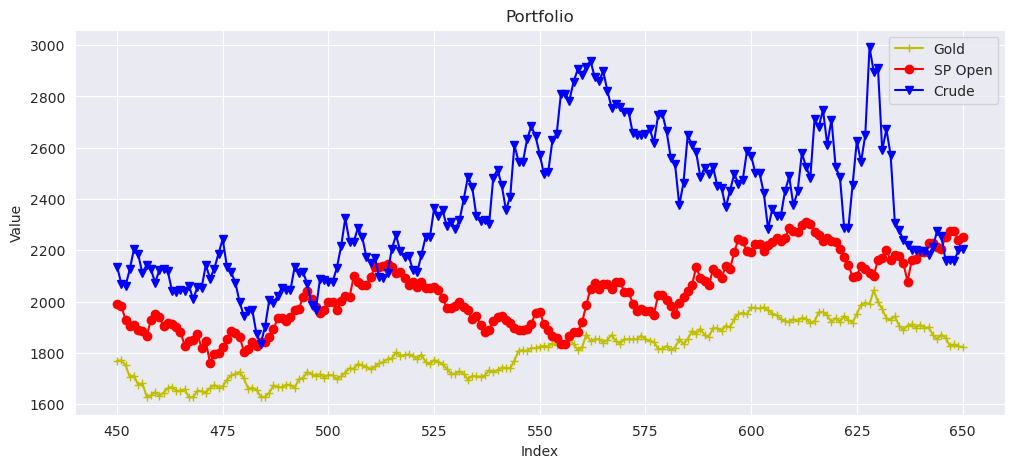

In [38]:
## Erstellen Sie einen Linegraph für das DataFrame 'df_portfolio'.
## Die Grafik soll eine Linie für jedes Merkmal des DataFrames 
## enthalten (d.h. es soll nicht der Kurs des jeweiligen Produkts, 
## sondern der Wert der im Portfolio gehaltenen Stückzahl visualisiert 
## werden). 
## 
## Zusätzliche Vorgaben
## - Achten Sie auf die Beschriftungen
## - Markieren Sie die tatsächlichen Datenpunkte mit einem Symbol Ihrer Wahl, um hervorzuheben welche Stellen für tatsächlich 
##   existierende  Werte stehen und welche für die Verbindungslinien. (Symbol muss sichtbar sein).
## - Der Lineplot soll den durch den Index des DataFrames abgebildeten *zeitlichen Verlauf* darstellen
## - Lösen Sie die Aufgabe mittels Matplotlib/DataFrames, nicht mittels Seaborn.

plt.rcParams["figure.figsize"] = (12,5)

plt.plot(df_portfolio.index, df_portfolio["Gold"], 'y+', linestyle='-', label='Gold')
plt.plot(df_portfolio.index, df_portfolio["SP Open"], 'ro', linestyle='-', label="SP Open")
plt.plot(df_portfolio.index, df_portfolio["Crude"], 'bv', linestyle='-', label="Crude")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Portfolio")
plt.show()

In [39]:
# Dummy zur Abbildung der Bewertung


Zum Abschluss visualisieren wir den Gesamtwert des Portfolios mit Hilfe eines Flächendiagramms, welches den Anteil der jeweiligen Positionen am Gesamtwert des Portfolios zeigt.

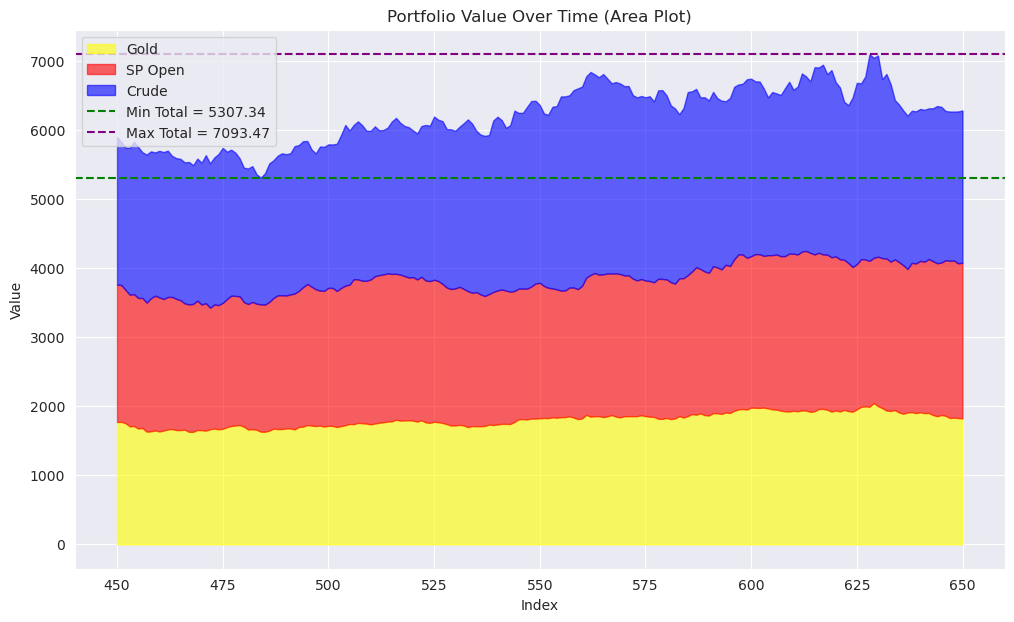

In [40]:
## Erstellen Sie ein Flächendiagramm (Area Plot), welches den Gesamtwert des Portfolios im zeitlichen 
## Verlauf sowie die Werte der jeweiligen Positionen darstellt. 
## 
## Dabei soll ein Datenpunkt für jeden Eintrag in 'df_portfolio' erstellt werden, 
## und das DataFrame 'df_portfolio' darf nicht verändert werden.
##
## Erweitern Sie die Grafik um zwei horizontale (parallel zur x-Achse) Linien: 
## Die erste Linie soll den geringsten Wert des Portfolios angeben, die zweite 
## Linie den höchsten Wert des Portfolios (jeweils im durch 'df_portfolio' 
## abgdecketen Zeitraum). 
## Die Linien sollen es ermöglichen, an jedem Datenpunkt den Abstand vom 
## geringsten/größten Wert des Depots zu sehen.
## 
## Das DataFrame 'df_portfolio' darf weiterhin nicht verändert werden.

plt.rcParams["figure.figsize"] = (12,7)

df_portfolio["Total"] = df_portfolio["Gold"] + df_portfolio["SP Open"] + df_portfolio["Crude"]

min_total = df_portfolio["Total"].min()
max_total = df_portfolio["Total"].max()

df_portfolio.drop(columns=["Total"], inplace=True)

plt.fill_between(df_portfolio.index, df_portfolio["Gold"], label="Gold", alpha=0.6, color="yellow")
plt.fill_between(df_portfolio.index, 
                 df_portfolio["Gold"], 
                 df_portfolio["Gold"] + df_portfolio["SP Open"], 
                 label="SP Open", 
                 alpha=0.6, color="red")
plt.fill_between(df_portfolio.index, 
                 df_portfolio["Gold"] + df_portfolio["SP Open"], 
                 df_portfolio["Gold"] + df_portfolio["SP Open"] + df_portfolio["Crude"], 
                 label="Crude", 
                 alpha=0.6, color="blue")

# Horizontale Linien für minimalen und maximalen Gesamtwert
plt.axhline(y=min_total, color='green', linestyle='--', linewidth=1.5, label=f"Min Total = {min_total:.2f}")
plt.axhline(y=max_total, color='purple', linestyle='--', linewidth=1.5, label=f"Max Total = {max_total:.2f}")

# Titel, Achsenbeschriftungen und Legende
plt.title("Portfolio Value Over Time (Area Plot)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

In [48]:
# Dummy zur Abbildung der Bewertung


# Ende
Damit haben Sie das 5. - und letzte - Übungsblatt fertig durchgearbeitet. Gratulation :) 
Bitte melden Sie sich bei Fragen, Problemen oder Unklarheiten rechtzeitig.

Sie haben die Übung damit abgeschlossen. Wir hoffen, Sie konnten dabei etwas nützliches mitnehmen.